In [ ]:
## Start from this Cell
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from pandas import read_excel
data=pd.read_csv('/content/drive/MyDrive/nlp bio informatics/final_rediology_data.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data.head()

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal


In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal
...,...,...
3949,The cardiac and mediastinal silhouettes are no...,abnormal
3950,Clear lungs bilaterally. Normal cardiac contou...,normal
3951,Heart size normal. Lungs clear. Stable 5 mm ca...,abnormal
3952,The cardiac and mediastinal silhouettes are un...,abnormal


In [ ]:
features = data.iloc[:, 0].values
labels = data.iloc[:, -1].values

In [ ]:
data.head()

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal


In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
data.head()

,fulltext,label
0,The cardiomediastinal silhouette appears irreg...,abnormal
1,Stable cardiomegaly. Improved aeration in the ...,abnormal
2,2 views of the chest demonstrate sternotomy a...,abnormal
3,"The heart, pulmonary and mediastinum are with...",abnormal
4,Stable appearance of aortic valve prosthesis. ...,abnormal


In [ ]:
from sklearn.preprocessing import LabelEncoder
reviews = processed_features
labels = data['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, test_size=0.2, random_state=0)


In [ ]:
from keras.utils import pad_sequences

# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
import tensorflow as tf
max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.utils import pad_sequences


input_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=maxlen)
input_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=maxlen)

In [ ]:
from tensorflow.keras.layers import GRU, Embedding, Bidirectional

embedding_dim = 32

model = keras.Sequential()

# encoder
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))
model.add(GRU(units=32))

# latent space
model.add(tf.keras.layers.Dense(name='fc', units=32, activation='relu'))

# binary classifier as decoder
model.add(tf.keras.layers.Dense(name='classifier', units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 fc (Dense)                  (None, 32)                1056      
                                                                 
 classifier (Dense)          (None, 1)                 33        
                                                                 
Total params: 327,425
Trainable params: 327,425
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 1000
history = model.fit(input_train, train_labels, epochs=10, batch_size=32,verbose=1)

Epoch 1/10
80/80 [==============================] - 29s 324ms/step - loss: 0.5174 - accuracy: 0.7830
Epoch 2/10
80/80 [==============================] - 22s 273ms/step - loss: 0.2124 - accuracy: 0.9235
Epoch 3/10
80/80 [==============================] - 24s 301ms/step - loss: 0.1259 - accuracy: 0.9590
Epoch 4/10
80/80 [==============================] - 24s 305ms/step - loss: 0.0969 - accuracy: 0.9680
Epoch 5/10
80/80 [==============================] - 24s 304ms/step - loss: 0.0823 - accuracy: 0.9759
Epoch 6/10
80/80 [==============================] - 24s 301ms/step - loss: 0.0592 - accuracy: 0.9822
Epoch 7/10
80/80 [==============================] - 22s 280ms/step - loss: 0.0548 - accuracy: 0.9834
Epoch 8/10
80/80 [==============================] - 27s 337ms/step - loss: 0.0444 - accuracy: 0.9886
Epoch 9/10
80/80 [==============================] - 25s 312ms/step - loss: 0.0401 - accuracy: 0.9882
Epoch 10/10
80/80 [==============================] - 23s 282ms/step - loss: 0.0421 - accura

In [ ]:
prediction = model.predict(input_test)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

20/20 [==============================] - 4s 161ms/step
Accuracy of prediction on test set :  0.9463722397476341


In [ ]:
print(classification_report(test_labels,pred_labels))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       487
           1       0.92      0.84      0.88       147

    accuracy                           0.95       634
   macro avg       0.94      0.91      0.92       634
weighted avg       0.95      0.95      0.95       634



In [ ]:
print(confusion_matrix(test_labels,pred_labels))


[[477  10]
 [ 24 123]]


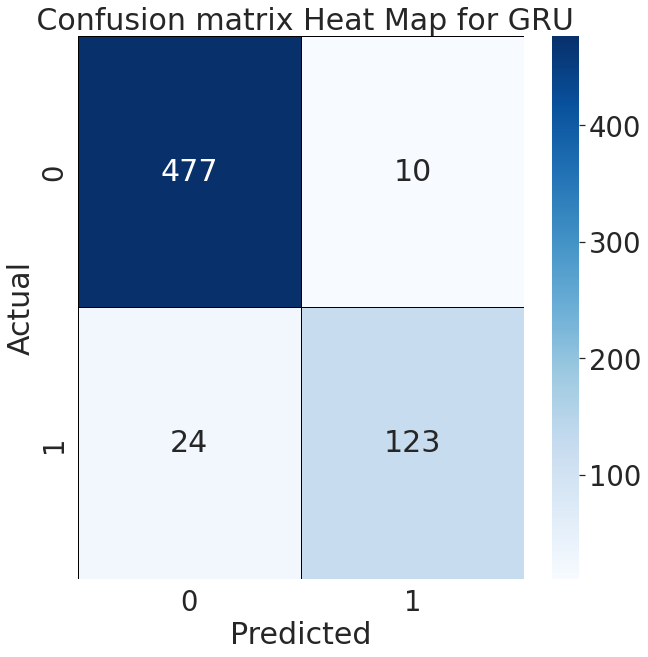

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels,pred_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
plt.title(" Confusion matrix Heat Map for GRU")

cm = metrics.confusion_matrix(test_labels,pred_labels)
sn.set(font_scale=2.5)

## SIMPLE RNN

In [ ]:

from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=maxlen))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
                        activation='relu',
                        return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               20608     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 340,737
Trainable params: 340,737
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
RNN_model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)
history = RNN_model.fit(input_train, train_labels, epochs=10, batch_size=32,verbose=1)

Epoch 1/10
80/80 [==============================] - 22s 250ms/step - loss: 0.4551 - accuracy: 0.7807
Epoch 2/10
80/80 [==============================] - 18s 230ms/step - loss: 0.2528 - accuracy: 0.8698
Epoch 3/10
80/80 [==============================] - 18s 226ms/step - loss: 0.2032 - accuracy: 0.9337
Epoch 4/10
80/80 [==============================] - 18s 231ms/step - loss: 0.8383 - accuracy: 0.8312
Epoch 5/10
80/80 [==============================] - 20s 244ms/step - loss: 0.1375 - accuracy: 0.9582
Epoch 6/10
80/80 [==============================] - 18s 229ms/step - loss: 0.3568 - accuracy: 0.9325
Epoch 7/10
80/80 [==============================] - 20s 252ms/step - loss: 0.1600 - accuracy: 0.9649
Epoch 8/10
80/80 [==============================] - 20s 251ms/step - loss: 0.0871 - accuracy: 0.9779
Epoch 9/10
80/80 [==============================] - 19s 231ms/step - loss: 0.0697 - accuracy: 0.9807
Epoch 10/10
80/80 [==============================] - 18s 230ms/step - loss: 0.0590 - accura

In [ ]:
prediction = RNN_model.predict(input_test)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

20/20 [==============================] - 2s 90ms/step
Accuracy of prediction on test set :  0.9574132492113565


In [ ]:
prediction = model.predict(input_test)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

In [ ]:
print(classification_report(test_labels,pred_labels))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       487
           1       0.95      0.86      0.90       147

    accuracy                           0.96       634
   macro avg       0.95      0.92      0.94       634
weighted avg       0.96      0.96      0.96       634



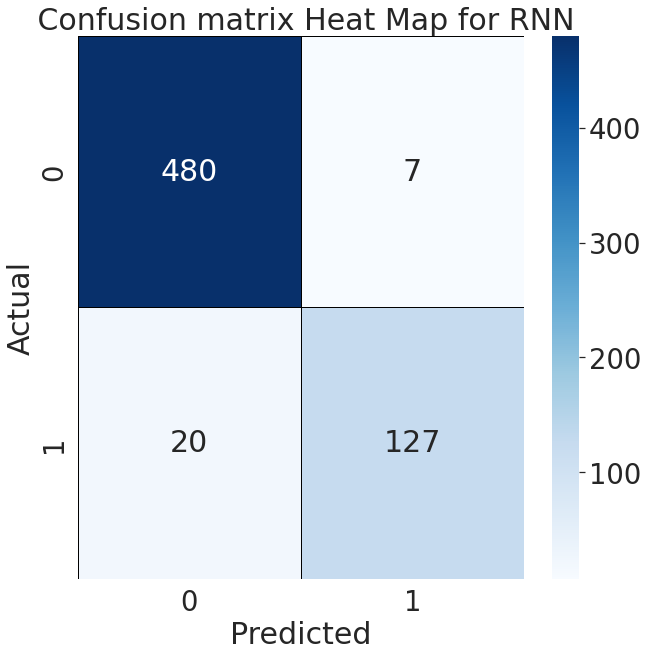

In [ ]:
import seaborn as sn
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels,pred_labels)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues",
            linecolor = 'black',
            linewidth = 1,
            annot = True,
            fmt='',
            )
plt.xlabel("Predicted")
sn.set(font_scale=2.5)

plt.ylabel("Actual")
plt.title(" Confusion matrix Heat Map for RNN")

cm = metrics.confusion_matrix(test_labels,pred_labels)
sn.set(font_scale=2.5)

In [ ]:
print(confusion_matrix(test_labels,pred_labels))


[[480   7]
 [ 20 127]]
